In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.random.seed(192)

In [7]:
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 30

In [26]:
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
Y = np.concatenate((np.ones((1, N)), -1*np.ones((1,N))), axis = 1)

X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
X.shape



(3, 60)

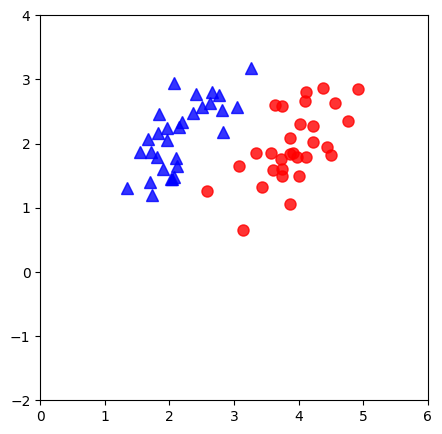

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))

ani = plt.cla()
#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
ani = plt.axis([0 , 6, -2, 4])
plt.show()

In [28]:
def h(w, x):
    return np.sign(w.T @ x)

In [29]:
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

In [30]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []

    while True:
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break

    return (w, mis_points)
        

In [32]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
w, m = perceptron(X,Y,w_init)

print(w[-1])



[[ 3.17037954]
 [-7.50398536]
 [ 8.70802074]]


In [34]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

MovieWriter imagemagick unavailable; using Pillow instead.


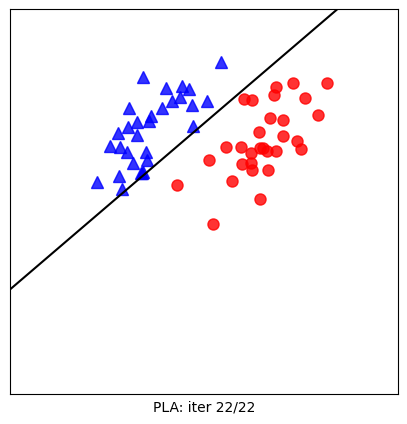

In [35]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def viz_alg_1d_2(w):
    it = len(w)
    fig, ax = plt.subplots(figsize=(5, 5))
    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 = i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # draw one misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill =
            False)
            ax.add_artist(circle)

        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])
        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax
    
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)

    anim.save('pla_vis.gif', dpi = 100, writer = 'imagemagick')
    plt.show()

viz_alg_1d_2(w)